# Comparison of SBP-SAT and SPECFEM2D in a two-layers medium

### Note1: all commands starting with '!' can be run directly from the command line (in case it doesn't work from the Notebook).

### Note2: If running within a Docker, no action is needed. If not, add the installation path (e.g. 'path_to_fwi2d_directory/local/bin') to the environment variable 'PATH' or prepend every executable with the above path.

In [1]:
import numpy as np
from scipy import signal
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams

Create directories to store data and figures

In [2]:
!mkdir -p ../dat ../fig

### Generate source wavelet (Ricker)

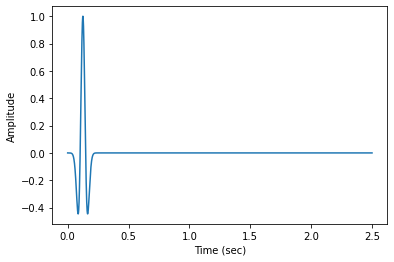

In [3]:
nt=5001
dt=0.0005
ot=0
wc=0.01
sigma=math.sqrt(2)/(math.pi*wc)
src1 = signal.ricker(2*nt-1, sigma)
src1=src1[4750:4750+nt]
src1=src1*1.0/np.max(src1)

plt.plot(np.linspace(ot,(nt-1)*dt,nt),src1)
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.show()

In [4]:
# save to text file for SPECFEM2D
file = open('../dat/src1.txt', 'w')
for i in range(nt):
    print("%.6f %.6f" %(i*dt+ot,src1[i]), file=file)
file.close()

# save to numpy
np.save('../dat/src1',src1)

# convert to SEPlib for SBP-SAT
!sep2numpy.py --input ../dat/src1.npy --mode 1 --datapath ${PWD}/../dat/ --output ../dat/src1.H

# set the sampling (in sec) in the description file
!echo d1=0.0005 >> ../dat/src1.H

### Generate a homogeneous isotropic elastic model

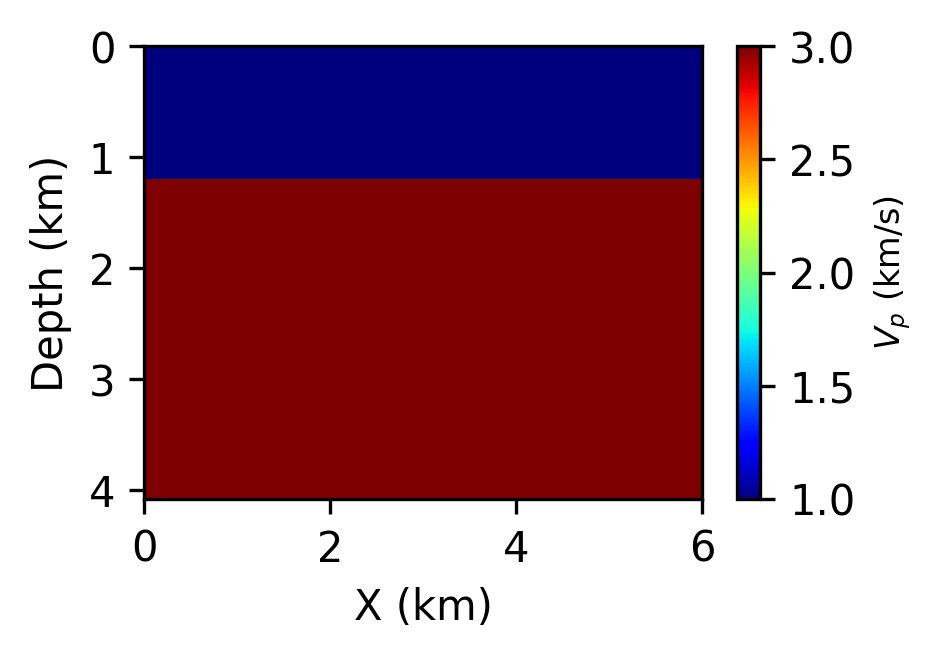

In [5]:
# elastic model
emodel=np.zeros((3,1201,577))
emodel[0,:,:]=3 # Vp in km/s
emodel[1,:,:]=1 # Vs in km/s
emodel[2,:,:]=2.5 # Density in g/cc

# full Vp model for plotting (acoustic on top then elastic)
aemodel=np.full((1201,818),3)
aemodel[:,:241]=1.5

fig, ax = plt.subplots(1,1,figsize=(3, 2),dpi=300)
im=ax.imshow(np.transpose(aemodel),interpolation='none',aspect="auto",extent=[0,6.,4.08,0],cmap='jet')
ax.set(xlabel='X (km)')
ax.set(ylabel='Depth (km)')
cbar=fig.colorbar(im, ax=ax,format='%.'+str(1)+'f',aspect=20)
cbar.set_label(label=r'$V_p$ (km/s)',size=8)

In [6]:
# save to numpy
np.save('../dat/emodel1',emodel)

# convert to SEPlib for SBP-SAT
!sep2numpy.py --input ../dat/emodel1.npy --output ../dat/emodel1.H --mode 1 --datapath ${PWD}/../dat/
!echo o1=1.2 d1=0.005 d2=0.005 >> ../dat/emodel1.H

### Run modeling using SPECFEM2D

In [7]:
# generate particle velocity recordings
!bash ../specfem2d/run_v.sh

running SPECFEM2D to model particle velocity with provided source time function in txt file: Thu Jul 14 22:07:49 UTC 2022
/home/sbp_sat_geophysics_2022/notebooks


(will take about 5 minutes)


   setting up the test


  running mesher...


 **********************************************
 *** Specfem 2-D Mesher - serial version    ***
 **********************************************

 Running Git version of the code corresponding to commit 7e019b622587b3abce752c6ebb0ec1033de8d848
 dating From Date:   Tue Jul 12 11:29:06 2022 +0300

 Reading the parameter file...

 Title of the simulation: Flat fluid/solid interface


 Receiver lines:
   Nb of line sets =            1

 Materials:
   Nb of solid, fluid or porous materials =            2

 --------
 Material #           1  isotropic
 rho,cp,cs   =    2500.0000000000000        3000.0000000000000        1000.0000000000000     
 Qkappa, Qmu =    9999.0000000000000        9999.0000000000000     
 Material is solid
 --------
 Material #       



 reading mesh databases:
 reading nodal coordinates...

 -- Spectral Elements --


     Number of spectral elements . . . . . . . . .  (nspec) =  61200
     Number of control nodes per element . . . . . (NGNOD) =      4
     Number of points in X-direction . . . . . . . (NGLLX) =      5
     Number of points in Y-direction . . . . . . . (NGLLZ) =      5
     Number of points per element. . . . . . (NGLLX*NGLLZ) =     25
     Number of points for display . . . . . . (pointsdisp) =      6
     Number of element material sets . . . . . . . (numat) =      2
     Number of acoustic forcing elements (nelem_acforcing) =      0
     Number of acoustic free surf (nelem_acoustic_surface) =    300

 reading attenuation setup...
 reading material properties..


 M a t e r i a l   s e t s :   2 D  (p o r o) e l a s t i c i t y

     Number of material sets . . . . . . (numat) =     2


     ----------------------------------------
     -- Elastic (solid) isotropic material --
     ---------------

     using mesh dimension : xmin/xmax =    0.00000000     /   6000.00000    
                            zmin/zmax =    0.00000000     /   4080.00000    
     thickness PML: left   =    200.000000    
                    right  =    200.000000    
                    bottom =    200.000000    
                    top    =    0.00000000    
     maximum dominant frequency (sources):    10.0000000    
     PML coefficients all set


 Attenuation:
   viscoelastic  attenuation: F (shear & bulk attenuation in elastic domains)
   viscoacoustic attenuation: F (bulk attenuation in acoustic domains)

 Preparing mass matrices
   initializing mass matrices
   inverting mass matrices


 Preparing source time function
   time stepping scheme:   Newmark
   time stepping stages:            1
   time step size      :    5.00000024E-04

   number of time steps:         5001
   number of sources   :            1

   saving the source time function in a text file...

 Movie simulation:
   color images   

 Creating color image of size          994  x          710  for time step          500
 drawing scalar image of the forward wavefield displacement...
 Color image maximum amplitude =    1.5148184356189587E-012
 Color image created


 ******************************************************************
Time step number    1000   t =    0.4995 s out of    5001
 ******************************************************************
 We have done    19.9799995     % of the total
 Max norm of vector field in solid (elastic) =    8.39781153E-13
 Max absolute value of scalar field in fluid (acoustic) =    2.32799167E-08
 Elapsed time in seconds =    100.98499989509583     
 Elapsed time in hh:mm:ss =      0 h 01 m 40 s
 Mean elapsed time per time step in seconds =   0.10098499989509582     
 Time steps remaining =         4001
 Estimated remaining time in seconds =    404.04098458027840     
 Estimated remaining time in hh:mm:ss =      0 h 06 m 44 s
 Estimated total run time in seconds =    505.025


 ******************************************************************
Time step number    4500   t =    2.2495 s out of    5001
 ******************************************************************
 We have done    89.9800034     % of the total
 Max norm of vector field in solid (elastic) =    4.68268165E-13
 Max absolute value of scalar field in fluid (acoustic) =    1.27686945E-08
 Elapsed time in seconds =    439.02300000190735     
 Elapsed time in hh:mm:ss =      0 h 07 m 19 s
 Mean elapsed time per time step in seconds =    9.7560666667090526E-002
 Time steps remaining =          501
 Estimated remaining time in seconds =    48.877894000212351     
 Estimated remaining time in hh:mm:ss =      0 h 00 m 48 s
 Estimated total run time in seconds =    487.90089400211968     
 Estimated total run time in hh:mm:ss =      0 h 08 m 07 s
 The run will finish approximately on: Thu Jul 14, 2022 22:16

 Creating color image of size          994  x          710  for time step         4500
 drawi

In [8]:
# copy the output
!cp ../dat/OUTPUT_FILES/AA.S0001.BXX.semd ../dat/specfem2d_data_vx.txt
!cp ../dat/OUTPUT_FILES/AA.S0001.BXZ.semd ../dat/specfem2d_data_vz.txt

In [9]:
# generate pressure recording
!bash ../specfem2d/run_p.sh

running SPECFEM2D to model particle velocity with provided source time function in txt file: Thu Jul 14 22:16:17 UTC 2022
/home/sbp_sat_geophysics_2022/notebooks


(will take about 5 minutes)


   setting up the test


  running mesher...


 **********************************************
 *** Specfem 2-D Mesher - serial version    ***
 **********************************************

 Running Git version of the code corresponding to commit 7e019b622587b3abce752c6ebb0ec1033de8d848
 dating From Date:   Tue Jul 12 11:29:06 2022 +0300

 Reading the parameter file...

 Title of the simulation: Flat fluid/solid interface


 Receiver lines:
   Nb of line sets =            1

 Materials:
   Nb of solid, fluid or porous materials =            2

 --------
 Material #           1  isotropic
 rho,cp,cs   =    2500.0000000000000        3000.0000000000000        1000.0000000000000     
 Qkappa, Qmu =    9999.0000000000000        9999.0000000000000     
 Material is solid
 --------
 Material #       



 reading mesh databases:
 reading nodal coordinates...

 -- Spectral Elements --


     Number of spectral elements . . . . . . . . .  (nspec) =  61200
     Number of control nodes per element . . . . . (NGNOD) =      4
     Number of points in X-direction . . . . . . . (NGLLX) =      5
     Number of points in Y-direction . . . . . . . (NGLLZ) =      5
     Number of points per element. . . . . . (NGLLX*NGLLZ) =     25
     Number of points for display . . . . . . (pointsdisp) =      6
     Number of element material sets . . . . . . . (numat) =      2
     Number of acoustic forcing elements (nelem_acforcing) =      0
     Number of acoustic free surf (nelem_acoustic_surface) =    300

 reading attenuation setup...
 reading material properties..


 M a t e r i a l   s e t s :   2 D  (p o r o) e l a s t i c i t y

     Number of material sets . . . . . . (numat) =     2


     ----------------------------------------
     -- Elastic (solid) isotropic material --
     ---------------

     using mesh dimension : xmin/xmax =    0.00000000     /   6000.00000    
                            zmin/zmax =    0.00000000     /   4080.00000    
     thickness PML: left   =    200.000000    
                    right  =    200.000000    
                    bottom =    200.000000    
                    top    =    0.00000000    
     maximum dominant frequency (sources):    10.0000000    
     PML coefficients all set


 Attenuation:
   viscoelastic  attenuation: F (shear & bulk attenuation in elastic domains)
   viscoacoustic attenuation: F (bulk attenuation in acoustic domains)

 Preparing mass matrices
   initializing mass matrices
   inverting mass matrices


 Preparing source time function
   time stepping scheme:   Newmark
   time stepping stages:            1
   time step size      :    5.00000024E-04

   number of time steps:         5001
   number of sources   :            1

   saving the source time function in a text file...

 Movie simulation:
   color images   

 Max norm of vector field in solid (elastic) =    1.08795026E-12
 Max absolute value of scalar field in fluid (acoustic) =    4.36908039E-08
 Elapsed time in seconds =    44.779000043869019     
 Elapsed time in hh:mm:ss =      0 h 00 m 44 s
 Mean elapsed time per time step in seconds =    8.9558000087738038E-002
 Time steps remaining =         4501
 Estimated remaining time in seconds =    403.10055839490889     
 Estimated remaining time in hh:mm:ss =      0 h 06 m 43 s
 Estimated total run time in seconds =    447.87955843877791     
 Estimated total run time in hh:mm:ss =      0 h 07 m 27 s
 The run will finish approximately on: Thu Jul 14, 2022 22:24

 Creating color image of size          994  x          710  for time step          500
 drawing scalar image of the forward wavefield displacement...
 Color image maximum amplitude =    1.5148184356189587E-012
 Color image created


 ******************************************************************
Time step number    1000   t =    

 Creating color image of size          994  x          710  for time step         4000
 drawing scalar image of the forward wavefield displacement...
 Color image maximum amplitude =    5.5420967294550483E-013
 Color image created


 ******************************************************************
Time step number    4500   t =    2.2495 s out of    5001
 ******************************************************************
 We have done    89.9800034     % of the total
 Max norm of vector field in solid (elastic) =    4.68268165E-13
 Max absolute value of scalar field in fluid (acoustic) =    1.27686945E-08
 Elapsed time in seconds =    566.80000019073486     
 Elapsed time in hh:mm:ss =      0 h 09 m 26 s
 Mean elapsed time per time step in seconds =   0.12595555559794108     
 Time steps remaining =          501
 Estimated remaining time in seconds =    63.103733354568483     
 Estimated remaining time in hh:mm:ss =      0 h 01 m 03 s
 Estimated total run time in seconds =    629.903

In [10]:
# copy the output
!cp ../dat/OUTPUT_FILES/AA.S0001.POT.semx ../dat/specfem2d_data_p.txt

### Run modeling using FWI2D

In [13]:
!WE_MODELING.x source=../dat/src1.H model=../dat/emodel1.H output=../dat/fd_data.H datapath=${PWD}/../dat/ wavefield=../dat/fd_data.H.wfld acoustic_elastic=1 acoustic_source=1 acoustic_wavefield=1 water_velocity=1.5 water_density=1 \
dt=0.0005 resampling=linear sub=100 fmax=30 verbose=3 \
ns=1 sx0=2.4 sz0=1.12 nr=1 rx0=3.44 rz0=1.2 seismotype=1 \
bc_top=1 free_surface_stiffness=1.4 bc_bottom=2 bc_left=2 bc_right=2 taper_top=0 taper_bottom=100 taper_left=100 taper_right=100 taper_strength=0.1


 Subsurface model geometry
xmin=0.00000 km, xmax=6.00000 km, dx=0.00500 km, nx=1201
zmin=1.20000 km, zmax=4.08000 km, dz=0.00500 km, nz=577
A fluid layer is implicitly added on top of the model, all the way up to z=0 km with nz=241 samples v=1.50 km/s and rho=1.00 g/cc

 Boundary conditions
Top boundary condition = free surface	 taper size = 0	 taper type = none
Bottom boundary condition = locally absorbing	 taper size = 100	 taper type = cosine squared
Left boundary condition = locally absorbing	 taper size = 100	 taper type = cosine squared
Right boundary condition = locally absorbing	 taper size = 100	 taper type = cosine squared

 Sources' and receivers' geometry
Sources' and receivers' coordinates are read from parameters list
Receivers are dual point measurement of type hydraulic pressure and particle velocity
Number of sources = 1
All sources must fall within the fluid layer
Shot 0 located at x=2.40000 km, z=1.12000 km, has 1 receivers
Total number of 3-components receivers to 

In [14]:
# convert to numpy
!sep2numpy.py --input ../dat/fd_data.H --output ../dat/fd_data --mode 0
!sep2numpy.py --input ../dat/fd_data.H.wfld --output ../dat/fd_data.wfld --mode 0
!sep2numpy.py --input ../dat/fd_data.H.wflda --output ../dat/fd_data.wflda --mode 0